In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import Classes 


# Visualize

import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro


#Classification Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Regression Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import KMeans




importing Jupyter notebook from Classes.ipynb


C:\Users\Asiye\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
dataset = pd.read_excel("HW_Data_Set.xlsx")
dataset.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
dataset = dataset[dataset['ind_420'] != '?']
dataset = dataset[dataset['ind_422'] != '?']

In [4]:
#dummy

RED = pd.get_dummies(dataset['ind_109'], drop_first =True)
dataset=pd.concat([dataset,RED],axis=1)
dataset.drop(['ind_109'],axis =1,inplace=True)

In [5]:
X = dataset.iloc[:, 0:132]
y = dataset.loc[:, dataset.columns == '20_target']

In [6]:
cate =X.select_dtypes(include='object')
cate

,ind_420,ind_422
0,-152,-353
1,-158,-359
2,-160,-362
3,-166,-367
4,-186,-388
...,...,...
6162,-11,-270
6163,-12,-271
6164,-21,-280
6165,-33,-292


In [7]:
X['ind_420'].astype(int)

0      -152
1      -158
2      -160
3      -166
4      -186
       ... 
6162    -11
6163    -12
6164    -21
6165    -33
6166    -28
Name: ind_420, Length: 5126, dtype: int32

In [8]:
X['ind_422'].astype(int)

0      -353
1      -359
2      -362
3      -367
4      -388
       ... 
6162   -270
6163   -271
6164   -280
6165   -292
6166   -288
Name: ind_422, Length: 5126, dtype: int32

In [9]:
# Shapiro 

for each in X.columns:
    stat , p = shapiro(X[each])
    if p > 0.5:
        print(colored(each +"  :  Normal dağılımdan(Gaussian) gelmektedir (Fail to Reject Ho)",'green'))
    else:
        print(colored(each+"   :Normal dağılımdan gelmemektedir",'red'))

ind_5   :Normal dağılımdan gelmemektedir
ind_6   :Normal dağılımdan gelmemektedir
ind_8   :Normal dağılımdan gelmemektedir
ind_9   :Normal dağılımdan gelmemektedir
ind_10   :Normal dağılımdan gelmemektedir
ind_12   :Normal dağılımdan gelmemektedir
ind_13   :Normal dağılımdan gelmemektedir
ind_14   :Normal dağılımdan gelmemektedir
ind_15   :Normal dağılımdan gelmemektedir
ind_16   :Normal dağılımdan gelmemektedir
ind_17   :Normal dağılımdan gelmemektedir
ind_18   :Normal dağılımdan gelmemektedir
ind_19   :Normal dağılımdan gelmemektedir
ind_20   :Normal dağılımdan gelmemektedir
ind_21   :Normal dağılımdan gelmemektedir
ind_22   :Normal dağılımdan gelmemektedir
ind_23   :Normal dağılımdan gelmemektedir
ind_25   :Normal dağılımdan gelmemektedir
ind_26   :Normal dağılımdan gelmemektedir
ind_27   :Normal dağılımdan gelmemektedir
ind_28   :Normal dağılımdan gelmemektedir
ind_29   :Normal dağılımdan gelmemektedir
ind_30   :Normal dağılımdan gelmemektedir
ind_31   :Normal dağılımdan gelmemekte

In [ ]:
X1 = sm.add_constant(X)
model = sm.OLS(y.astype(float), X1.astype(float)).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle = False)
X_train.shape

(3588, 132)

# Linear Regression

In [10]:
gsh = Classes.GridSearchHelper()


Grid Search Helper...


In [11]:
y_train

,20_target
0,15.135802
1,15.143348
2,15.146870
3,15.153283
4,-15.179065
...,...
4624,-14.860256
4625,14.855729
4626,14.840008
4627,14.840386


In [12]:
y_train_ = y_train.iloc[:,0]
y_train_

0       15.135802
1       15.143348
2       15.146870
3       15.153283
4      -15.179065
          ...    
4624   -14.860256
4625    14.855729
4626    14.840008
4627    14.840386
4628    14.842524
Name: 20_target, Length: 3588, dtype: float64

In [13]:
y_test_ = y_test.iloc[:,0]
y_test_

4629    14.848686
4630    14.847931
4631    14.854345
4632    14.853213
4633    14.854974
          ...    
6162    14.673247
6163    14.673750
6164   -14.684566
6165   -14.699280
6166   -14.693117
Name: 20_target, Length: 1538, dtype: float64

In [14]:

lr = gsh.LinearReg(X_train,X_test,y_train_,y_test_)
lr

RMSE :  16.505380163155262


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
gsh.MinMaxScaleModel("Linear",lr,X_train,X_test,y_train,y_test)

RMSE :  16.50537968842335


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [16]:
gsh.StandardScaleModel("Linear",lr,X_train,X_test,y_train,y_test)

RMSE :  16.505382323493073


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

## Assumptions

In [18]:
v = Classes.Visualizer()

###  <li> 1. Linearity </li>

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


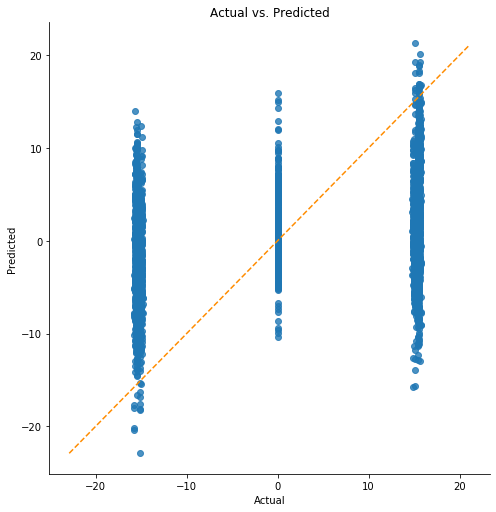

In [19]:

v.linear_assumption(lr, X_train,y_train_)


### <li> 2. Normality of the Error Terms </li>

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


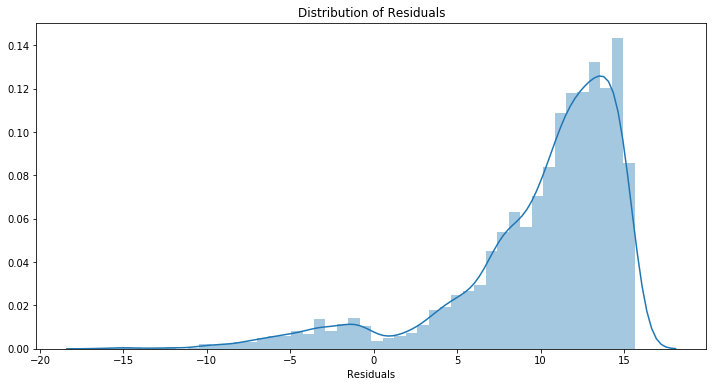


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [20]:
v.normal_errors_assumption(lr,X_train,y_train_)

### <li> 3. Homoscedasticity </li>

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


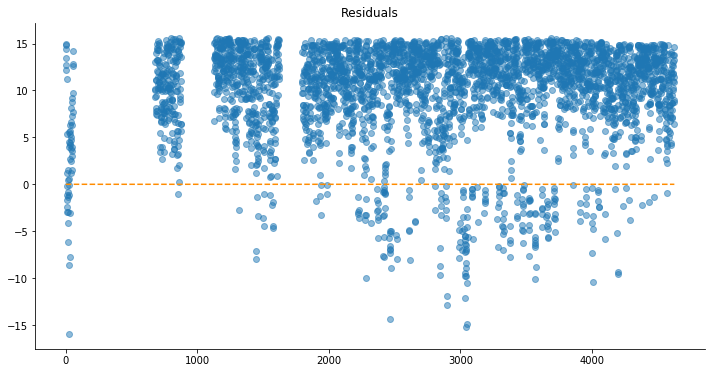

In [21]:
v.homoscedasticity_assumption(lr,  X_train, y_train_)

### <li> 4. No Autocorrelation of the Error Terms </li>


In [22]:
v.autocorrelation_assumption(lr, X_train, y_train_)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.13721235072470642
Signs of positive autocorrelation 

Assumption not satisfied


# Decision Tree

In [15]:
dt = gsh.DecisionTreeReg(X_train,X_test,y_train,y_test)
dt

RMSE :  21.364996581051802


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
gsh.MinMaxScaleModel("Decision Tree",dt,X_train,X_test,y_train,y_test)

RMSE :  21.28461570032632


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [51]:
gsh.StandardScaleModel("Decision Tree",dt,X_train,X_test,y_train,y_test)

RMSE :  21.145494258139372


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

### Model Tuning

In [26]:
params_dt = {#"min_samples_split" : range(20,50),
             # "min_samples_leaf" : range(10,15,20),
             # "max_leaf_nodes": range(4,8),
             "max_depth": range(1,30)}



In [27]:
tuned_dt = gsh.GridSearchCVR('Decision Tree',dt,params_dt,X_train,X_test,y_train, y_test)

En iyi parametresi :{'max_depth': 2}
Tuned Model RMSE :  14.629910996137536


In [ ]:
v = Classes.Visualizer()
v.GraphTree(tuned_dt,X_train)

# Random Forest

In [52]:
rf = gsh.RandomForestReg(X_train,X_test,y_train,y_test)
rf

RMSE :  15.94423686102096


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
gsh.MinMaxScaleModel("Random Forest",rf,X_train,X_test,y_train,y_test)

RMSE :  15.709145308331102


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [54]:
gsh.StandardScaleModel("Random Forest",rf,X_train,X_test,y_train,y_test)

RMSE :  15.056461550547393


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

### Model Tuning

In [33]:
params_rf = { #"max_features" : [3,5,10,15],
              "n_estimators" :[10,15]}

In [34]:
tuned_rf = gsh.GridSearchCVR('Random Forest',rf,params_rf,X_train,X_test,y_train, y_test)

En iyi parametresi :{'n_estimators': 15}
Tuned Model RMSE :  15.750776159342292


# Neural Network

In [55]:
nn = gsh.NeuralNetworkReg(X_train,X_test,y_train,y_test)
nn

RMSE :  21.687808909935992


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
gsh.MinMaxScaleModel("Neural Network",nn,X_train,X_test,y_train,y_test)

RMSE :  15.506856907556232


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [57]:
gsh.StandardScaleModel("Neural Network",nn,X_train,X_test,y_train,y_test)

RMSE :  21.94081429200772


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

### Model Tuning

In [38]:
params_nn = {'alpha' : [0.1,0.01,0.02],
             
            # 'activation' : ['relu', 'logistic']
            }

In [39]:
tuned_nn = gsh.GridSearchCVR('Neural Network',nn,params_nn,X_train,X_test,y_train, y_test)

En iyi parametresi :{'alpha': 0.1}
Tuned Model RMSE :  20.65099894772258


# SVM

In [58]:
svr = gsh.SVMReg(X_train,X_test,y_train,y_test)
svr

RMSE :  14.451186980535283


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
gsh.MinMaxScaleModel("SVM",svr,X_train,X_test,y_train,y_test)

RMSE :  14.434125406358046


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [28]:
gsh.StandardScaleModel("SVM",svr,X_train,X_test,y_train,y_test)

RMSE :  15.0895585244795


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

### Model Tuning

In [ ]:
params_svr = {'kernel': ['sigmoid','linear']}

In [ ]:
tuned_svr =gsh.GridSearchCVR('SVM',svr,params_svr,X_train,X_test,y_train, y_test)

# KNN

In [59]:
knn = gsh.KNNReg(X_train,X_test,y_train,y_test)
knn

RMSE :  16.37904591276598


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [60]:
gsh.MinMaxScaleModel("SVM",svr,X_train,X_test,y_train,y_test)

RMSE :  14.434125406358046


(array([[0.66216216, 0.64864865, 1.        , ..., 1.        , 0.49854651,
         0.78773616],
        [0.69594595, 0.66216216, 1.        , ..., 1.        , 0.53708791,
         0.77362977],
        [0.73648649, 0.69594595, 1.        , ..., 1.        , 0.61516854,
         0.77644125],
        ...,
        [0.52027027, 0.49324324, 0.35714286, ..., 0.15231788, 0.6119403 ,
         0.44400446],
        [0.52027027, 0.52027027, 0.28571429, ..., 0.        , 0.52373418,
         0.4401374 ],
        [0.51351351, 0.52027027, 0.21428571, ..., 0.        , 0.59747292,
         0.43843004]]),
 array([[0.50675676, 0.51351351, 0.14285714, ..., 1.        , 0.72541744,
         0.44899437],
        [0.5       , 0.50675676, 0.07142857, ..., 1.        , 0.72761905,
         0.42736799],
        [0.50675676, 0.5       , 0.        , ..., 1.        , 0.7033195 ,
         0.4455459 ],
        ...,
        [0.66216216, 0.68243243, 0.42857143, ..., 0.76923077, 0.63210702,
         0.59646706],
        [0.6

In [61]:
gsh.StandardScaleModel("SVM",svr,X_train,X_test,y_train,y_test)

RMSE :  15.0895585244795


(array([[ 9.14539521e-01,  8.22690452e-01,  1.42072396e+00, ...,
          1.20740423e+00, -1.39989653e-03,  1.41706388e+00],
        [ 1.14075650e+00,  9.13141151e-01,  1.42072396e+00, ...,
          1.20740423e+00,  1.66318008e-01,  1.34305770e+00],
        [ 1.41221688e+00,  1.13926790e+00,  1.42072396e+00, ...,
          1.20740423e+00,  5.06095992e-01,  1.35780753e+00],
        ...,
        [-3.55718007e-02, -2.17492588e-01, -3.56873704e-01, ...,
         -7.90606878e-01,  4.92047886e-01, -3.86251877e-01],
        [-3.55718007e-02, -3.65911900e-02, -5.54384556e-01, ...,
         -1.14962450e+00,  1.08207497e-01, -4.06539587e-01],
        [-8.08151970e-02, -3.65911900e-02, -7.51895408e-01, ...,
         -1.14962450e+00,  4.29091226e-01, -4.15496868e-01]]),
 array([[-0.12605859, -0.08181654, -0.94940626, ...,  1.20740423,
          0.9858584 , -0.36007333],
        [-0.17130199, -0.12704189, -1.14691711, ...,  1.20740423,
          0.99543898, -0.47353161],
        [-0.12605859, -0.

### Model Tuning

In [ ]:
params_knn = {"n_neighbors": np.arange(1,50,1),
          #"weights": ["uniform","distance"],
          #"metric" :["minkowski", "euclidean","manhattan"]
             }

In [ ]:
tuned_knn = gsh.GridSearchCVR('KNN',knn,params_knn,X_train,X_test,y_train, y_test)

# All RMSE

In [62]:
gsh.AllRMSE()

,RMSE,RMSE_MinMaxScaled,RMSE_StandardScaled,PCA,Tuned
Linear,16.5054,NaN,NaN,NaN,NaN
Decision Tree,21.365,21.2846,21.1455,20.6573,NaN
Random Forest,15.9442,15.7091,15.0565,NaN,NaN
Neural Network,21.6878,15.5069,21.9408,NaN,NaN
SVM,14.4512,14.4341,15.0896,NaN,NaN
KNN,16.379,NaN,NaN,NaN,NaN


# PCA Models

In [63]:
gsh.PCAModel("Linear",lr,X_train,X_test,y_train,y_test)

In [64]:
gsh.PCAModel("Decision Tree",dt,X_train,X_test,y_train,y_test)

In [65]:
gsh.PCAModel("Random Forest",rf,X_train,X_test,y_train,y_test)

In [66]:
gsh.PCAModel("Neural Network",nn,X_train,X_test,y_train,y_test)

In [ ]:
gsh.PCAModel("SVM",svr,X_train,X_test,y_train,y_test)

In [67]:
gsh.PCAModel("KNN",knn,X_train,X_test,y_train,y_test)

In [68]:
gsh.AllRMSE()

,RMSE,RMSE_MinMaxScaled,RMSE_StandardScaled,PCA,Tuned
Linear,16.5054,NaN,NaN,16.5054,NaN
Decision Tree,21.365,21.2846,21.1455,20.6853,NaN
Random Forest,15.9442,15.7091,15.0565,15.4873,NaN
Neural Network,21.6878,15.5069,21.9408,25.7873,NaN
SVM,14.4512,14.4341,15.0896,NaN,NaN
KNN,16.379,NaN,NaN,16.379,NaN


# NAIVE BAYES

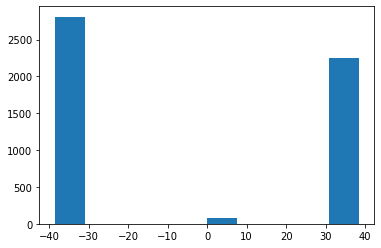

In [41]:
plt.hist(dataset['90_target'], bins = 10)
plt.show()

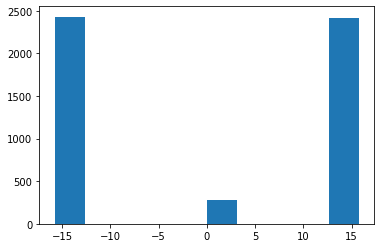

In [42]:
plt.hist(dataset['20_target'], bins = 10)
plt.show()

In [18]:
dataset['y_90target'] = ['Neg' if each <0   else  'Poz' if each>0  else 'Zero' for each in dataset['90_target']]

In [19]:
dataset['y_20target'] = ['Neg' if each <0   else  'Poz' if each>0  else 'Zero' for each in dataset['20_target']]

In [20]:
y_ = dataset['y_90target']

In [21]:
y_20 = dataset['y_20target']

In [35]:
# 90 Target

X_train_,X_test_,y_train_,y_test_=train_test_split(X,y_,test_size=0.40,random_state=42,shuffle = False)
X_train_.shape


(3075, 132)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_)
X_train_s = scaler.transform(X_train_)
X_test_s = scaler.transform(X_test_)

In [38]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train_s, y_train_)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
y_pred = mnb_model.predict(X_test_s)
accuracy_score(y_pred, y_test_)

0.5616772306192102

In [40]:
cm = confusion_matrix(y_test_, y_pred)
cm

array([[917, 231,  16],
       [639, 235,  13],
       [  0,   0,   0]], dtype=int64)

In [41]:
print(classification_report(y_test_,y_pred))

              precision    recall  f1-score   support

         Neg       0.59      0.79      0.67      1164
         Poz       0.50      0.26      0.35       887
        Zero       0.00      0.00      0.00         0

    accuracy                           0.56      2051
   macro avg       0.36      0.35      0.34      2051
weighted avg       0.55      0.56      0.53      2051



In [42]:
# 20 target

X_train_20,X_test_20,y_train_20,y_test_20=train_test_split(X,y_20,test_size=0.3,random_state=42,shuffle = False)
X_train_20.shape

(3588, 132)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_20)
X_train_s = scaler.transform(X_train_20)
X_test_s = scaler.transform(X_test_20)

In [44]:
mnb_20 = MultinomialNB()
mnb_model_20 = mnb_20.fit(X_train_s, y_train_20)
mnb_model_20

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
y_pred = mnb_model_20.predict(X_test_s)
accuracy_score(y_pred, y_test_20)

0.5123537061118335

In [46]:
print(classification_report(y_test_20,y_pred))

              precision    recall  f1-score   support

         Neg       0.52      0.74      0.61       764
         Poz       0.50      0.31      0.38       721
        Zero       0.00      0.00      0.00        53

    accuracy                           0.51      1538
   macro avg       0.34      0.35      0.33      1538
weighted avg       0.49      0.51      0.48      1538



In [47]:
y_pred_t = mnb_model_20.predict(X_train_s)
accuracy_score(y_pred_t, y_train_20)

0.512263099219621

In [48]:
print(classification_report(y_train_20,y_pred_t))

              precision    recall  f1-score   support

         Neg       0.50      0.63      0.56      1666
         Poz       0.53      0.47      0.50      1697
        Zero       0.00      0.00      0.00       225

    accuracy                           0.51      3588
   macro avg       0.34      0.36      0.35      3588
weighted avg       0.48      0.51      0.49      3588



# K Means

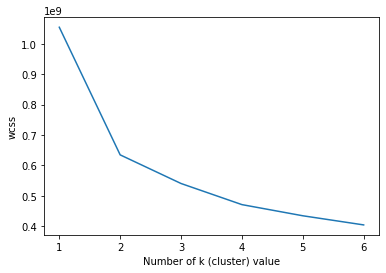

In [31]:
K = range(1,7)
vc = Classes.Visualizer()
elbow = vc.Elbow(K,X)

In [32]:
cluster = gsh.Kmeans(X,3)

# Hiyerarşik Kümeleme

In [33]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X)

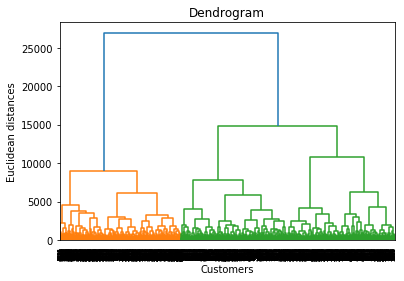

In [34]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()